# CASTOR UVMOS Spectrograph ETC Example Generate Own Blackbody (Exoplanet Science Case 2)

_Written by Jocelyn Roney - July 2025_

_With help from Dr. Tyrone Woods and Isaac Cheng_

This notebook shows two examples using the UVMOS. This Notebook will simulate the M star EV Lac, this star was chosen from the phase 0 report and will be observed by CASTOR when launched. The UVMOS is used for the quiesecent phase at a temperature of 3370K and flaring phase at a temperature of 9000K. This Notebook creates a source using CASTOR's function `MySource.generate_bb` which emission and absorbtion lines are added too. A CASTOR spectra is created and the Signal-to-Noise Ratio for the element Mg II k and h are calculated. This element is prominent for M stars in the UV making it ideal for CASTOR to use.

In [47]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

from castor_etc.background import Background
from castor_etc.photometry import Photometry
from castor_etc.sources import ExtendedSource, GalaxySource, PointSource
from castor_etc.telescope import Telescope

from castor_etc.uvmos_spectroscopy import UVMOS_Spectroscopy
plt.rcParams.update(plt.rcParamsDefault) #Used to make graphs on Visual Studio Code and matplotlib.pyplot

## Describe the Telescope and Background

In [48]:
MyTelescope = Telescope()
MyBackground = Background()

## Simulate the Source: Quiesecent Phase

This notebook uses the `PointSource` as the type of source the temperature is 3370K, radius is 0.331 solar masses and it has a distance of 0.00155kpc from Earth. The limits [900, 40000] were were adjusted to have a full blackbody curve.

In general, the creation of any Source object has three steps:

1) Determining the type of the source (i.e., a point source, an extended source like a diffuse nebula, a galaxy, etc.)

2) Describing the physical properties of the source, such as its spectrum (including any emission/absorption lines), the surface brightness profile of an extended source or galaxy, its redshift, distance, etc. Not all of these parameters need to be specified depending on your source.

3) (Optional) Renormalizing the source spectrum. There are many normalization schemes available (e.g., normalize to an AB magnitude within a passband, normalize to a total luminosity and distance). Note that these normalizations can be applied at any time (e.g., can be before or after the addition of spectral lines).
Currently, for the UVMOS-ETC only point sources are supported. Point sources are treated as Gaussian profiles with a FWHM equal to that of the telescope

However, a variety of spectra may be used. This includes blackbody spectra and spectra from the Pickles library.

c:\Users\jgron\anaconda3\envs\castor\Lib\site-packages\castor_etc\spectrum.py:1187: RuntimeWarning: Setting negative flux in spectrum to zero.
  warnings.warn("Setting negative flux in spectrum to zero.", RuntimeWarning)


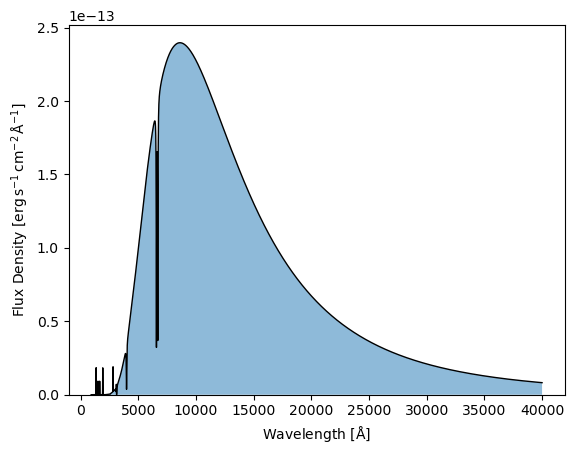

In [49]:
MySource = PointSource()
MySource.generate_bb(3370 * u.K, radius= 0.331, dist= 0.00155, redshift=0.00, limits=[900, 40000] * u.AA)  


##You may also use the pickles spectrum or Power law##
# Pickles Spectrum
#spectral_class = 'b0v'
#MySource.use_pickles_spectrum(spectral_class)

# Power Law
# waves = np.arange(100,500,0.5)*u.nm
# ref_wave = 100 *u.nm
# MySource.generate_power_law(ref_wave, waves, 3)




##Emission lines for EV Lac (peaks)##

#Mentioned in CASTOR phase 0 report
MySource.add_emission_line(
    center=2796.35 * u.AA, fwhm=20 * u.AA, peak=5e-13, shape="gaussian", abs_peak=False) #Mg II h
MySource.add_emission_line(
    center=2803.53 * u.AA, fwhm=20 * u.AA, peak=5e-13, shape="gaussian", abs_peak=False) #Mg II k
MySource.add_emission_line(
    center=1640 * u.AA, fwhm=20 * u.AA, peak=5e-13, shape="gaussian", abs_peak=False) #He II
MySource.add_emission_line(
    center=1906.8 * u.AA, fwhm=20 * u.AA, peak=5e-13, shape="gaussian", abs_peak=False) #C III
MySource.add_emission_line(
    center=1909 * u.AA, fwhm=20 * u.AA, peak=5e-13, shape="gaussian", abs_peak=False) #C III 
MySource.add_emission_line(
    center= 3086.24 * u.AA, fwhm=20 * u.AA, peak=5e-13, shape="gaussian", abs_peak=False) #Si III
MySource.add_emission_line(
   center= 1492.62  * u.AA, fwhm=20 * u.AA, peak=5e-13, shape="gaussian", abs_peak=False) #N V 
MySource.add_emission_line(
    center= 1334.532   * u.AA, fwhm=20 * u.AA, peak=5e-13, shape="gaussian", abs_peak=False) #C II
MySource.add_emission_line(
    center= 1335.708  * u.AA, fwhm=20 * u.AA, peak=5e-13, shape="gaussian", abs_peak=False) #C II

##Absorbtion lines for EV Lac (dips)##

#Found from google
MySource.add_absorption_line(
    center=6562.8 * u.AA, fwhm=40 * u.AA, dip=2e-12, shape="lorentzian", abs_dip= True) #Hα line
MySource.add_absorption_line(
    center=3969 * u.AA, fwhm=50 * u.AA, dip=2e-13, shape="lorentzian", abs_dip= True) #CaH
#Mentioned in CASTOR phase 0 report
MySource.add_absorption_line(
    center=6678.2 * u.AA, fwhm=40 * u.AA, dip=2e-12, shape="lorentzian", abs_dip= True) #He I line
MySource.add_absorption_line(
    center=2541.82 * u.AA, fwhm=50 * u.AA, dip=2e-14, shape="lorentzian", abs_dip= True) #Si III
MySource.add_absorption_line(
    center=3093.42 * u.AA, fwhm=50 * u.AA, dip=2e-13, shape="lorentzian", abs_dip= True) #Si III


# Optional: Renormalize the spectrum so it has a bolometric AB magnitude
# Note that bolometric AB magnitudes assume perfect telescope detector response over the
# whole spectrum. Please read the docstring for this function for more details.
MySource.norm_to_AB_mag(10)

#save your spectrum
#plt.savefig('Quiescent_EVLac_spectrum.png')

#Visualize the spectrum
MySource.show_spectrum()

## Do Spectroscopy

In [50]:
#Create Spectroscopy object
MySpec = UVMOS_Spectroscopy(MyTelescope, MySource, MyBackground)

#You can change the min and max with the functions below#
#MySpec.min_wave = (150 * u.nm).to(u.AA)
#MySpec.max_wave = (300 * u.nm).to(u.AA)


# Specify the slit
MySpec.specify_slit()
#You can chage the height and width of the slit with the function below
#MySpec.specify_slit(slit_width = 0.15 * u.arcsec, slit_height = 0.5 * u.arcsec)


# Optional: Show the source as viewed through the slit
MySpec.show_slit()

# Optional: Show a single image of the slit on the detector
MySpec.show_source_pix_weights()

In [51]:
MySpec.calc_source_CASTORSpectrum(extraction_width=1, extraction_lowerlim=4, extraction_upperlim = 7)
MySpec.calc_background_CASTORSpectrum(extraction_width=1, extraction_lowerlim=4, extraction_upperlim = 7)

# Optional: Visualize the source and background spectra on the detector
#
plt.figure(figsize=(100,3))

ax1 = plt.subplot(211)
plt.imshow(MySpec.source_detector,origin='lower',cmap='magma',aspect='auto')
plt.title('Source Spectrum on Detector')
plt.xlabel('Pixel')
plt.ylabel('Pixel')
ax1.set_aspect('equal')


ax2 = plt.subplot(212, sharex=ax1, sharey=ax1)
plt.imshow(MySpec.background_detector*MySpec.source_extracted_numpixs,origin='lower',cmap='magma',aspect='auto', vmin=min(MySpec.source_detector.flatten()), vmax=max(MySpec.source_detector.flatten()))
plt.title('Background Spectrum on Detector')
plt.xlabel('Pixel')
plt.ylabel('Pixel')
ax2.set_aspect('equal')
#
# Optional: Visualize the source and background 
#
plt.figure(figsize=(10,4))
ax = plt.subplot(111)
plt.plot(MySpec.waves_CASTORSpectrum, MySpec.source_CASTORSpectrum,'-',label='Source Spectrum')

plt.plot(MySpec.waves_CASTORSpectrum, MySpec.background_CASTORSpectrum*MySpec.source_extracted_numpixs,'-',label='Background Spectrum')

plt.title('CASTOR Spectra')
plt.xlabel('Wavelength '+r'[$\AA$]')
plt.ylabel('Flux [counts / second ]')
plt.grid(alpha=0.5)
plt.legend()

**Determine Exposure time for Mg II k or 2803.53 Angstrum**

In [52]:
t = 100 # seconds
wave = 2803.53 # angstroms
snr = MySpec.calc_snr_from_t(t, wave)
print('An exposure time of {:.3g} seconds is required to reach a SNR of {:.3f} at a wavelength of {} angstroms'.format(t, snr, wave))


An exposure time of 100 seconds is required to reach a SNR of 0.582 at a wavelength of 2803.53 angstroms


In [53]:
snr = 50
wave = 2803.53 # angstroms
t = MySpec.calc_t_from_snr(snr, wave)
print('An exposure time of {:.3g} seconds or {:.3g} hours is required to reach a SNR of {:.3f} at a wavelength of {} angstroms'.format(t, t/3600, snr, wave))


An exposure time of 9.78e+03 seconds or 2.72 hours is required to reach a SNR of 50.000 at a wavelength of 2803.53 angstroms


**Determine Exposure time for Mg II h or 2796.35 Angstrum**

In [54]:
t = 100 # seconds
wave = 2796.35 # angstroms
snr = MySpec.calc_snr_from_t(t, wave)
print('An exposure time of {:.3g} seconds is required to reach a SNR of {:.3f} at a wavelength of {} angstroms'.format(t, snr, wave))


An exposure time of 100 seconds is required to reach a SNR of 0.585 at a wavelength of 2796.35 angstroms


In [55]:
snr = 50
wave = 2796.35 # angstroms
t = MySpec.calc_t_from_snr(snr, wave)
print('An exposure time of {:.3g} seconds or {:.3g} hours is required to reach a SNR of {:.3f} at a wavelength of {} angstroms'.format(t, t/3600, snr, wave))


An exposure time of 9.73e+03 seconds or 2.7 hours is required to reach a SNR of 50.000 at a wavelength of 2796.35 angstroms


### *Repeat for Flaring Phase*

## Simulate the Source: Flaring Phase

In [56]:
MyTelescope = Telescope()
MyTelescope = Telescope(read_noise=1.0)
MyBackground = Background()

We will now repeat the steps but changing the `PointSource` to have a temperature 9000K, radius is 0.331 solar masses and it has a distance of 0.00155kpc from Earth. 

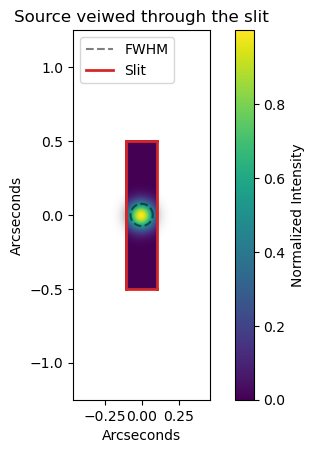

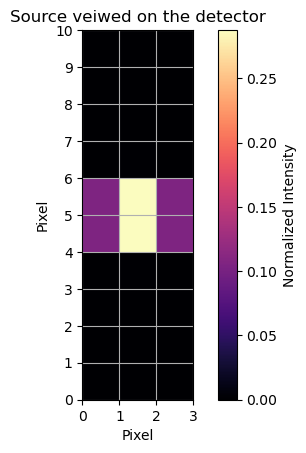

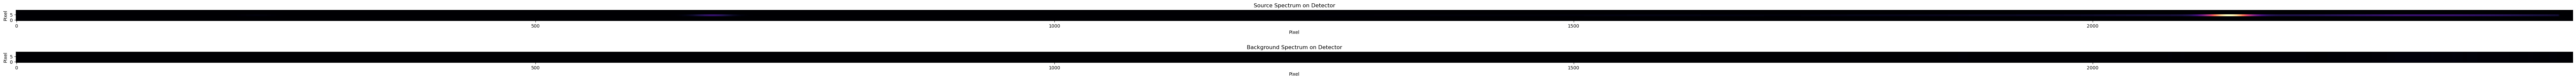

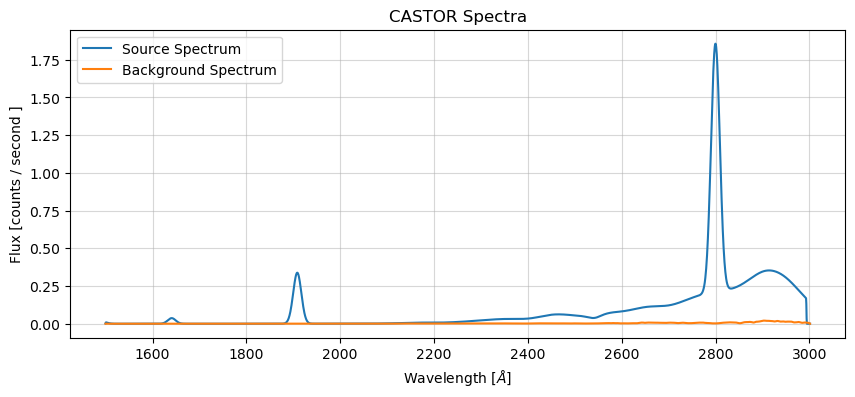

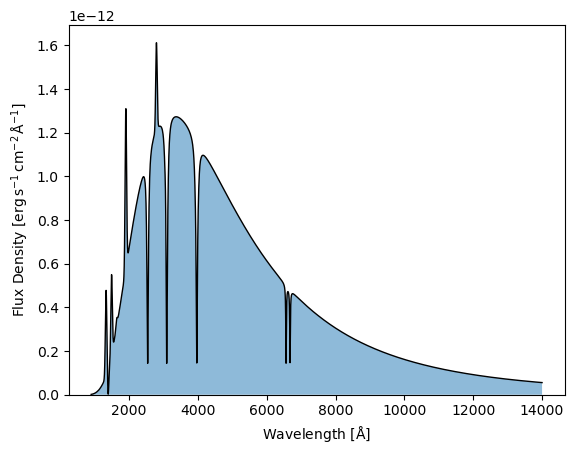

In [57]:
MySource = PointSource()
MySource.generate_bb(9000 * u.K, radius= 0.331, dist= 0.00155, redshift=0.00, limits=[900, 14000] * u.AA)



##Emission lines for EV Lac (peaks)##

#Found from google
MySource.add_emission_line(
    center=3969.4 * u.AA, fwhm=50 * u.AA, peak=5e-10, shape="gaussian", abs_peak=False) #Fe II (singly ionized iron)
#Mentioned in CASTOR phase 0 report
MySource.add_emission_line(
    center=2796.35 * u.AA, fwhm=50 * u.AA, peak=5e-10, shape="gaussian", abs_peak=False) #Mg II h
MySource.add_emission_line(
    center=2803.53 * u.AA, fwhm=50 * u.AA, peak=5e-11, shape="gaussian", abs_peak=False) #Mg II k
MySource.add_emission_line(
    center=1640 * u.AA, fwhm=50 * u.AA, peak=5e-11, shape="gaussian", abs_peak=False) #He II
MySource.add_emission_line(
    center=1906.8 * u.AA, fwhm=50 * u.AA, peak=5e-10, shape="gaussian", abs_peak=False) #C III
MySource.add_emission_line(
    center=1909 * u.AA, fwhm=50 * u.AA, peak=5e-10, shape="gaussian", abs_peak=False) #C III 
MySource.add_emission_line(
    center= 3086.24 * u.AA, fwhm=50 * u.AA, peak=5e-10, shape="gaussian", abs_peak=False) #Si III
MySource.add_emission_line(
    center= 1492.62  * u.AA, fwhm=50 * u.AA, peak=5e-10, shape="gaussian", abs_peak=False) #N V 
MySource.add_emission_line(
    center= 1334.532   * u.AA, fwhm=50 * u.AA, peak=5e-10, shape="gaussian", abs_peak=False) #C II
MySource.add_emission_line(
    center= 1335.708  * u.AA, fwhm=50 * u.AA, peak=5e-11, shape="gaussian", abs_peak=False) #C II

##Absorbtion lines for EV Lac (dips)##

#Found from google
MySource.add_absorption_line(
    center=6562.8 * u.AA, fwhm=20 * u.AA, dip=2e-10, shape="lorentzian", abs_dip= True) #Hα line
MySource.add_absorption_line(
    center=3969 * u.AA, fwhm=50 * u.AA, dip=2e-10, shape="lorentzian", abs_dip= True) #CaH
#Mentioned in CASTOR phase 0 report
MySource.add_absorption_line(
    center=6678.2 * u.AA, fwhm=20 * u.AA, dip=2e-10, shape="lorentzian", abs_dip= True) #He I line
MySource.add_absorption_line(
    center=2541.82 * u.AA, fwhm=50 * u.AA, dip=2e-10, shape="lorentzian", abs_dip= True) #Si III
MySource.add_absorption_line(
    center=3093.42 * u.AA, fwhm=50 * u.AA, dip=2e-10, shape="lorentzian", abs_dip= True) #Si III
MySource.add_absorption_line(
    center=1394 * u.AA, fwhm=50 * u.AA, dip=2e-11, shape="lorentzian", abs_dip= True) #Si IV
MySource.add_absorption_line(
    center= 1403 * u.AA, fwhm=50 * u.AA, dip=2e-11, shape="lorentzian", abs_dip= True) #Si IV

MySource.norm_to_AB_mag(10)
MySource.show_spectrum()

## Do Spectroscopy

In [58]:
#Create Spectroscopy object
MySpec = UVMOS_Spectroscopy(MyTelescope, MySource, MyBackground)

# Specify the slit
MySpec.specify_slit()

# Optional: Show the source as viewed through the slit
MySpec.show_slit()

# Optional: Show a single image of the slit on the detector
MySpec.show_source_pix_weights()

In [59]:
MySpec.calc_source_CASTORSpectrum(extraction_width=1, extraction_lowerlim=4, extraction_upperlim = 7)
MySpec.calc_background_CASTORSpectrum(extraction_width=1, extraction_lowerlim=4, extraction_upperlim = 7)
#
# Optional: Visualize the source and background spectra on the detector
#
plt.figure(figsize=(100,3))

ax1 = plt.subplot(211)
plt.imshow(MySpec.source_detector,origin='lower',cmap='magma',aspect='auto')
plt.title('Source Spectrum on Detector')
plt.xlabel('Pixel')
plt.ylabel('Pixel')
ax1.set_aspect('equal')


ax2 = plt.subplot(212, sharex=ax1, sharey=ax1)
plt.imshow(MySpec.background_detector*MySpec.source_extracted_numpixs,origin='lower',cmap='magma',aspect='auto', vmin=min(MySpec.source_detector.flatten()), vmax=max(MySpec.source_detector.flatten()))
plt.title('Background Spectrum on Detector')
plt.xlabel('Pixel')
plt.ylabel('Pixel')
ax2.set_aspect('equal')
#
# Optional: Visualize the source and background 
#
plt.figure(figsize=(10,4))
ax = plt.subplot(111)
plt.plot(MySpec.waves_CASTORSpectrum, MySpec.source_CASTORSpectrum,'-',label='Source Spectrum')

plt.plot(MySpec.waves_CASTORSpectrum, MySpec.background_CASTORSpectrum*MySpec.source_extracted_numpixs,'-',label='Background Spectrum')

plt.title('CASTOR Spectra')
plt.xlabel('Wavelength '+r'[$\AA$]')
plt.ylabel('Flux [counts / second ]')
plt.grid(alpha=0.5)
plt.legend()

**Determine Exposure time for Mg II k or 2803.53 Angstrum**

In [60]:
t = 100 # seconds
wave = 2803.53 # angstroms
snr = MySpec.calc_snr_from_t(t, wave)
print('An exposure time of {:.3g} seconds is required to reach a SNR of {:.3f} at a wavelength of {} angstroms'.format(t, snr, wave))


An exposure time of 100 seconds is required to reach a SNR of 97.296 at a wavelength of 2803.53 angstroms


In [61]:
snr = 50
wave = 2803.53 # angstroms
t = MySpec.calc_t_from_snr(snr, wave)
print('An exposure time of {:.3g} seconds or {:.3g} hours is required to reach a SNR of {:.3f} at a wavelength of {} angstroms'.format(t, t/3600, snr, wave))


An exposure time of 41.1 seconds or 0.0114 hours is required to reach a SNR of 50.000 at a wavelength of 2803.53 angstroms


**Determine Exposure time for Mg II h or 2796.35 Angstrum**

In [62]:
t = 100 # seconds
wave = 2796.35 # angstroms
snr = MySpec.calc_snr_from_t(t, wave)
print('An exposure time of {:.3g} seconds is required to reach a SNR of {:.3f} at a wavelength of {} angstroms'.format(t, snr, wave))


An exposure time of 100 seconds is required to reach a SNR of 98.502 at a wavelength of 2796.35 angstroms


In [63]:
snr = 50
wave = 2796.35 # angstroms
t = MySpec.calc_t_from_snr(snr, wave)
print('An exposure time of {:.3g} seconds or {:.3g} hours is required to reach a SNR of {:.3f} at a wavelength of {} angstroms'.format(t, t/3600, snr, wave))


An exposure time of 40.3 seconds or 0.0112 hours is required to reach a SNR of 50.000 at a wavelength of 2796.35 angstroms


When comparing the two sets Quiesecent Phase to Flaring Phase we can see a drastically different SNR ratio even with the same emission and abosrbtion lines. This contrast will be important when deciding observation time to capture the stars equilibrium.